In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os



In [20]:

#TODO Introducir el dataset con el que se vaya a trabajar
df = pd.read_csv('data_gdc/gdc_output.csv')
df_copy = df[['identificacion', 'ddd', 'dddstd', 'dddx', 'fhora', 'hr', 'lluv', 'pres', 'temp', 'ts', 'vel', 'velx', 'qdato']]
df_copy['fhora'] = pd.to_datetime(df_copy['fhora'])
df_copy['ddd'] = np.radians(df_copy['ddd'])
df_copy = df_copy.sort_values('fhora')

In [22]:
df_copy['fhora'].tail(20)

945901   2024-03-23 20:40:00+00:00
945902   2024-03-23 20:50:00+00:00
945903   2024-03-23 21:00:00+00:00
945904   2024-03-23 21:10:00+00:00
945905   2024-03-23 21:20:00+00:00
945906   2024-03-23 21:30:00+00:00
945907   2024-03-23 21:40:00+00:00
945908   2024-03-23 21:50:00+00:00
945909   2024-03-23 22:00:00+00:00
945910   2024-03-23 22:10:00+00:00
945911   2024-03-23 22:20:00+00:00
945912   2024-03-23 22:30:00+00:00
945913   2024-03-23 22:40:00+00:00
945914   2024-03-23 22:50:00+00:00
945915   2024-03-23 23:00:00+00:00
945916   2024-03-23 23:10:00+00:00
945917   2024-03-23 23:20:00+00:00
945918   2024-03-23 23:30:00+00:00
945919   2024-03-23 23:40:00+00:00
945920   2024-03-23 23:50:00+00:00
Name: fhora, dtype: datetime64[ns, UTC]

In [24]:
# Convierte la columna 'fhora' a un índice de tiempo
df_copy['fhora'] = pd.to_datetime(df_copy['fhora'])
df_copy = df_copy.set_index('fhora')

# Agrupa por hora y calcula la media
df_resampled = df_copy.resample('H').mean()


C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\3608954077.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_copy.resample('H').mean()


,lluvAcumulada,lluv
fhora,,
2019-10-30 20:50:00+00:00,NaN,0.2
2019-10-30 21:00:00+00:00,1.1,0.0
2019-10-30 21:10:00+00:00,NaN,0.2
2019-10-30 21:20:00+00:00,NaN,0.3
2019-10-30 21:30:00+00:00,NaN,0.2
2019-10-30 21:40:00+00:00,NaN,0.2
2019-10-30 21:50:00+00:00,NaN,0.2
2019-10-30 22:00:00+00:00,0.4,0.1
2019-10-30 22:10:00+00:00,NaN,0.1


In [26]:
df_resampled.isnull().sum()

identificacion     3166
ddd                3166
dddstd             3166
dddx               3166
hr                 3166
lluv              46544
pres              40817
temp              53424
ts                55901
vel               35466
velx              35857
qdato              3166
dtype: int64

In [28]:
df_resampled.to_csv('gdc_2006_2024_resampled.csv')

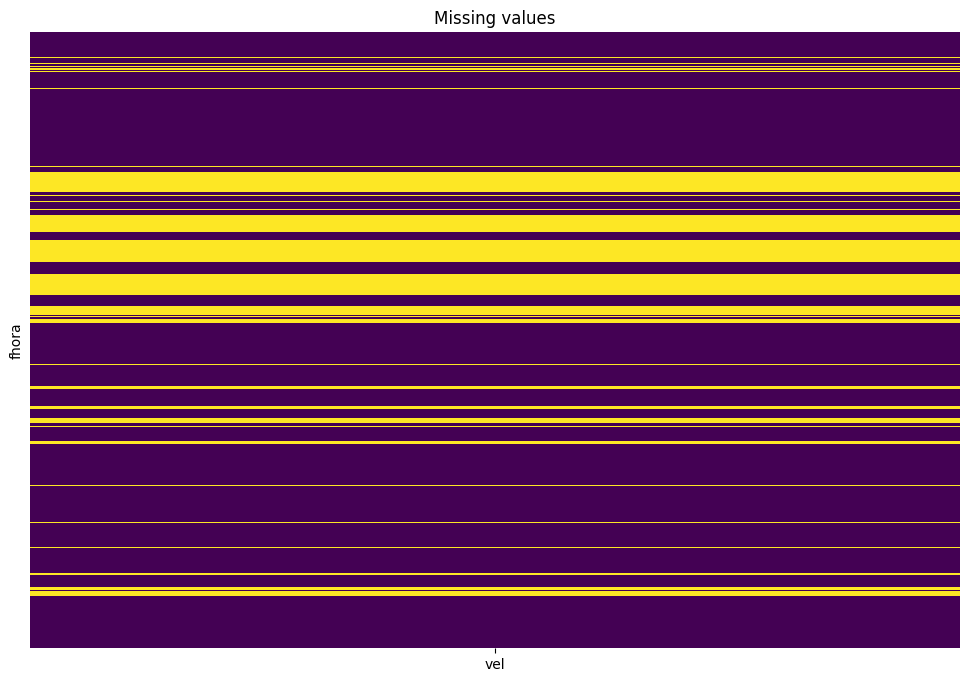

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_resampled[['vel']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values')
plt.show()

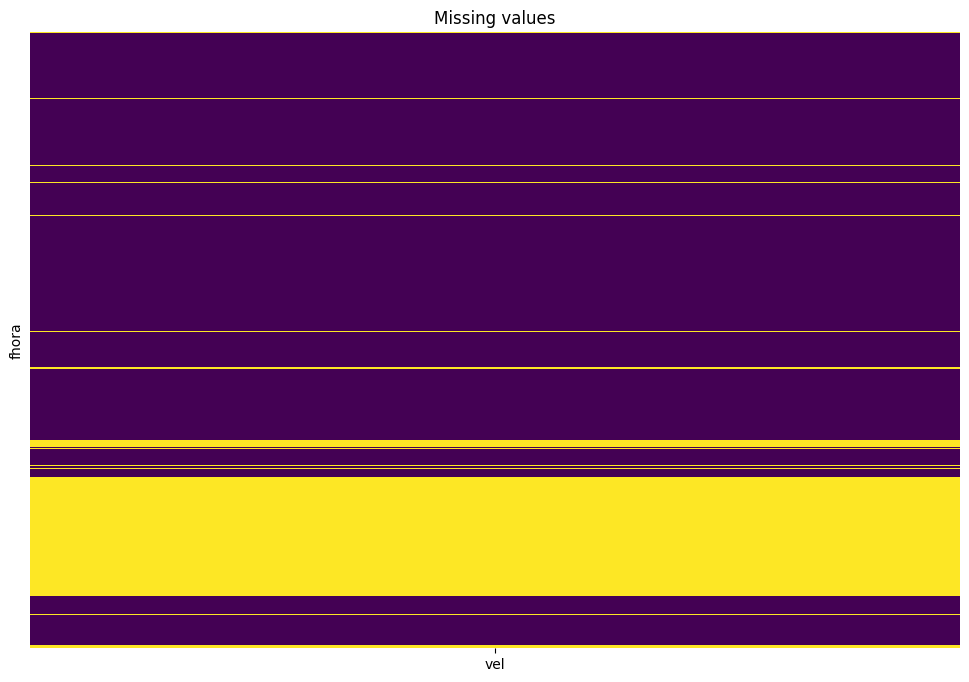

In [33]:
df_filtered = df_resampled.loc['2007-12-01':'2010-12-31']
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered[['vel']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values')
plt.show()

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\3641063133.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_copy.resample('H').mean()


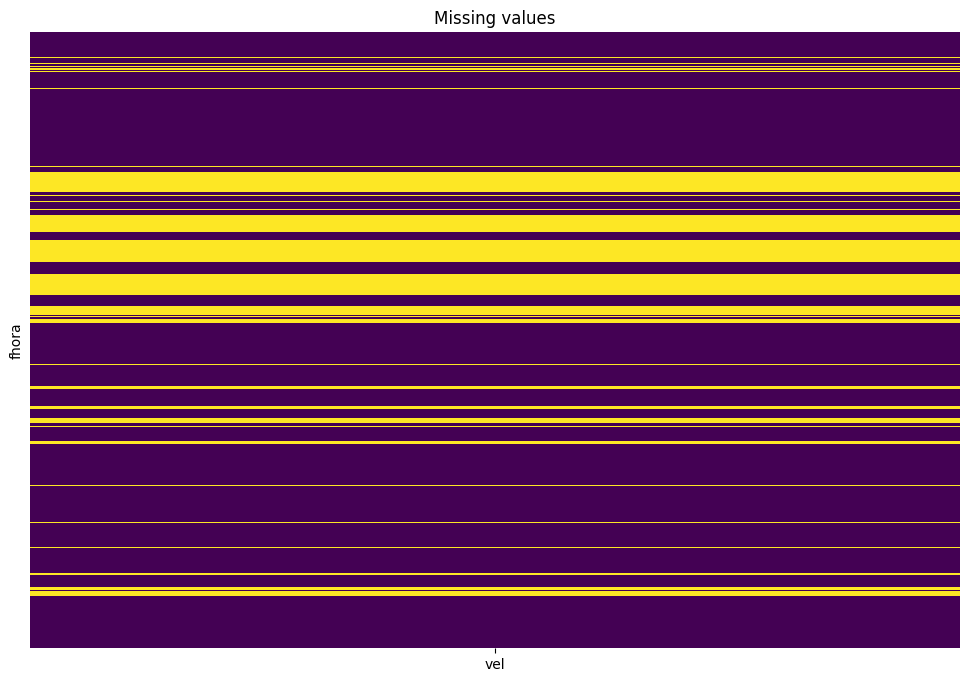

In [49]:
# Agrupa por hora y calcula la media
df_resampled = df_copy.resample('H').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_resampled[['vel']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values')
plt.show()

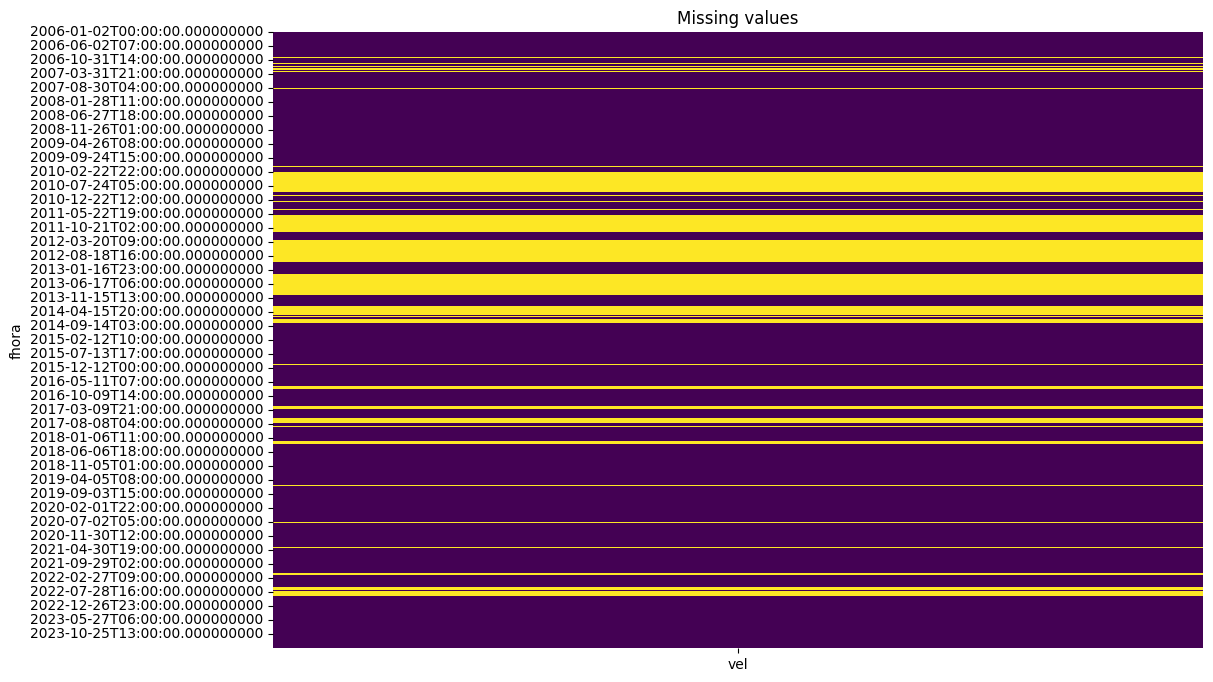

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_resampled[['vel']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [ ]:
Hacer lo mismo pero soloc on las horas en punto en lugar de media.

In [52]:
df_horapunto = df_copy[df_copy.index.minute == 0]

df_horapunto.head(10)

,identificacion,ddd,dddstd,dddx,hr,lluv,pres,temp,ts,vel,velx,qdato
fhora,,,,,,,,,,,,
2006-01-02 00:00:00+00:00,89070,6.038839,0,0,0,0.0,1005.2,NaN,1.8,9.2,13.8,0
2006-01-02 01:00:00+00:00,89070,5.846853,0,0,0,0.0,1005.4,NaN,1.7,8.3,15.2,0
2006-01-02 02:00:00+00:00,89070,6.003933,0,0,0,0.0,1005.6,NaN,1.7,8.7,13.8,0
2006-01-02 03:00:00+00:00,89070,5.951573,0,0,0,0.0,1005.8,NaN,1.7,7.4,12.4,0
2006-01-02 04:00:00+00:00,89070,6.021386,0,0,0,0.0,1006.1,NaN,1.6,5.8,10.1,0
2006-01-02 05:00:00+00:00,89070,0.017453,0,0,0,0.0,1006.2,NaN,1.7,6.2,8.9,0
2006-01-02 06:00:00+00:00,89070,0.104720,0,0,0,0.0,1006.2,NaN,2.1,5.4,8.7,0
2006-01-02 07:00:00+00:00,89070,0.157080,0,0,0,0.0,1006.2,NaN,2.8,7.2,12.0,0
2006-01-02 08:00:00+00:00,89070,0.052360,0,0,0,0.0,1006.2,NaN,2.9,7.0,10.1,0


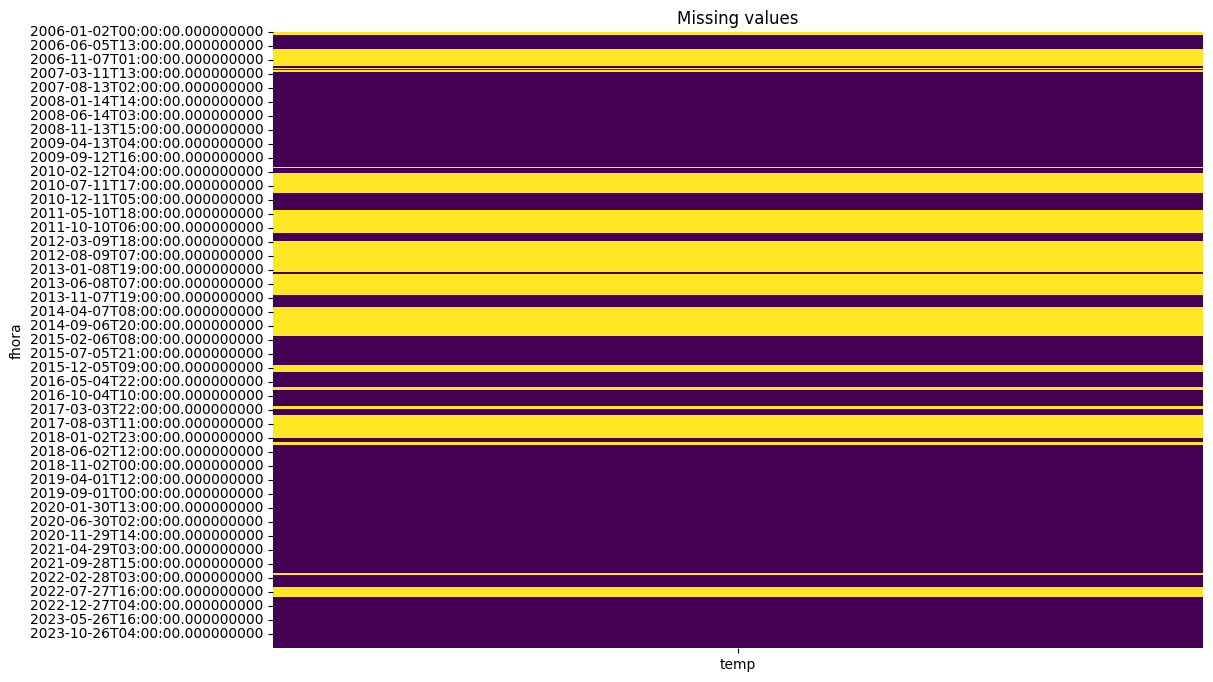

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_horapunto[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

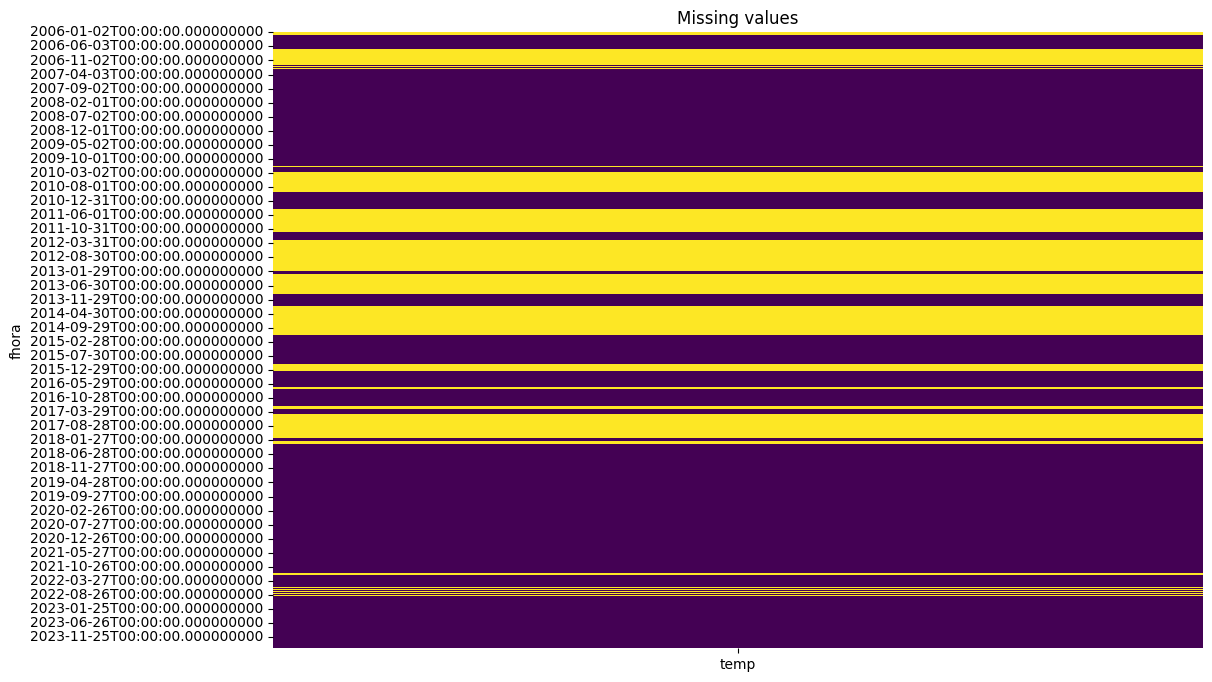

In [62]:
df_horapunto_resample = df_horapunto.resample('D').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_horapunto_resample[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

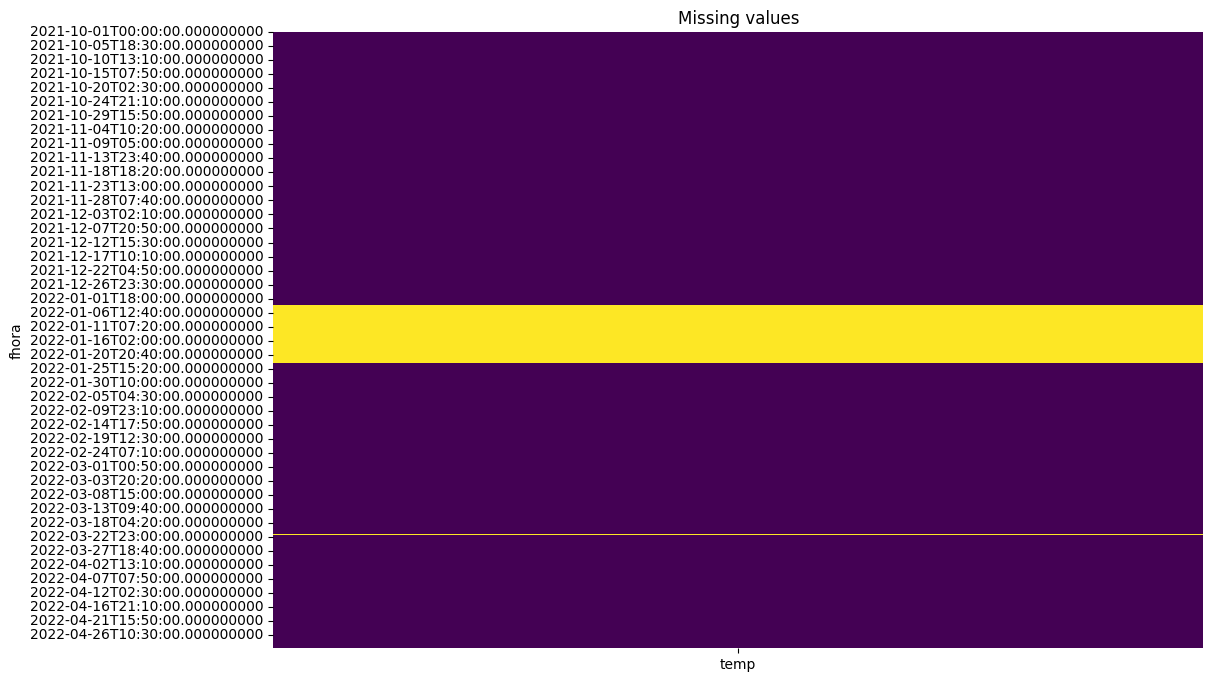

In [71]:
df_periodo = df_copy[['temp']].loc['2021-10-01':'2022-04-30']

plt.figure(figsize=(12, 8))
sns.heatmap(df_periodo[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [88]:
df_acumulate = df_horapunto.resample('H').sum()
df_horapunto['lluvAcumulada'] = df_acumulate['lluv']
df_periodo = df_horapunto['2021-02-01':'2024-06-30']

df_periodo[['lluvAcumulada', 'lluv']].head(30)

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_acumulate = df_horapunto.resample('H').sum()
C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horapunto['lluvAcumulada'] = df_acumulate['lluv']


,lluvAcumulada,lluv
fhora,,
2021-02-01 00:00:00+00:00,0.1,0.1
2021-02-01 01:00:00+00:00,0.1,0.1
2021-02-01 02:00:00+00:00,0.0,0.0
2021-02-01 03:00:00+00:00,0.0,0.0
2021-02-01 04:00:00+00:00,0.0,0.0
2021-02-01 05:00:00+00:00,0.2,0.2
2021-02-01 06:00:00+00:00,0.0,0.0
2021-02-01 07:00:00+00:00,0.0,0.0
2021-02-01 08:00:00+00:00,0.0,0.0


In [91]:
correspondence = df_periodo['lluvAcumulada'].eq(df_periodo['lluv'])
correspondence.value_counts()

True     24328
False     2899
Name: count, dtype: int64